In [ ]:
#AI Trainer for the Adjustments Project


In [98]:
#Load input data
import pandas as pd
import numpy as np

#Load data
df=pd.read_csv('SampleData.csv')
df.head(10)

,AdjustmentType,AdjustmentName,AdjustedField,Drawn,Undrawn,PD,CustomerID,CustomerType,AccountType,Approach,RiskCategory,SubDivision,IsDefaulted,CountryCode,NewVal
0,Amend,German Retail Downturn,RiskCategory,124553,870304,0.55,CUST563201,Retail,Other,ADV,Low,HSBC_IR,0,DE,Medium
1,Amend,BREXIT_DEFAULTED,RiskCategory,83665,348195,0.39,CUST450896,Retail,Revolver,ADV,Medium,HSBC_UK,1,GB,High
2,Amend,BREXIT,RiskCategory,391137,61592,0.12,CUST238947,SME,Current,ADV,Low,HSBC_US,0,GB,Medium
3,Amend,Noise_19b,CustomerID,643761,288541,0.39,CUST359147,Retail,Investment,FOU,High,HSBC_US,0,US,CUST665428
4,Amend,Noise_22d,CustomerID,181927,540516,0.69,CUST563201,SME,Mortgage,FOU,Medium,HSBC_US,0,DE,CUST981372
5,Amend,BREXIT,RiskCategory,721774,98526,0.28,CUST103289,Retail,Current,ADV,Low,HSBC_IR,0,GB,Medium
6,Amend,BREXIT,RiskCategory,798232,873463,0.06,CUST450896,Corporate,Credit Card,STD,Low,HSBC_IR,0,GB,Medium
7,Amend,US STD downgrade,RiskCategory,451209,386290,0.35,CUST981372,Retail,Savings,STD,Low,HSBC_CORP,0,US,High
8,Amend,German Retail Downturn,RiskCategory,409180,112872,0.93,CUST238947,Retail,Insurance,STD,Low,HSBC_UK,0,DE,Medium
9,Amend,German Retail Downturn,RiskCategory,967766,632222,0.64,CUST192654,Retail,Savings,STD,High,HSBC_US,0,DE,Medium


In [105]:
#Stage 1: OneHot encode string inputs and labels so we can use them in the model

#Build list of all string columns in the dataframe
string_columns=[]
for col in df.columns:
    if df[col].dtype=='object' and col!="NewVal":
        string_columns.append(col)

#Turn output labels into numbers
outputLabels=df["NewVal"].unique()

#make copy of output labels
outputLabels=outputLabels.copy()

#Create a dictionary to map the output labels to numbers
outputLabelsDict={}
for i in range(len(outputLabels)):
    outputLabelsDict[outputLabels[i]]=i

#Create inverse dictionary
outputLabelsInvDict={}
for i in range(len(outputLabels)):
    outputLabelsInvDict[i]=outputLabels[i]

#FFS map destroys original dict
#outputLabelsDictCopy=outputLabelsDict.copy()

#Deep copy original labels dict and change data type so its JSON serializable
# copyInvDict={}
# for key in outputLabelsInvDict:
#     copyInvDict[int(key)]=str(outputLabelsInvDict[key])

df_encoded=pd.get_dummies(df, columns=string_columns)
df_encoded["NewVal"]=df["NewVal"].map(outputLabelsDict)

df_encoded
#outputLabelsInvDict


{0: 'Medium',
 1: 'High',
 2: 'CUST665428',
 3: 'CUST981372',
 4: '0.75',
 5: 'Debt Recovery',
 6: 'Revolver',
 7: 'US',
 8: 'GB',
 9: 'FOU',
 10: 'Current',
 11: 'STD',
 12: 'Loan',
 13: 'HSBC_IR',
 14: 'ADV',
 15: 'CUST103289',
 16: '0',
 17: 'HSBC_CORP',
 18: 'Corporate',
 19: '1',
 20: 'HSBC_AP',
 21: 'SME',
 22: 'HSBC_UK',
 23: 'Retail',
 24: 'CUST712035',
 25: 'Investment',
 26: 'CUST563201',
 27: 'CUST192654',
 28: 'Insurance',
 29: 'Credit Card',
 30: 'CUST238947',
 31: 'DE',
 32: 'CUST359147',
 33: 'Low',
 34: 'Savings',
 35: 'CUST804231',
 36: 'CUST450896',
 37: 'HSBC_DEBTS',
 38: 'Mortgage',
 39: 'HSBC_US',
 40: 'Other'}

In [106]:
#Detach the NewVal column and onehot encode it!
labels=df_encoded["NewVal"]
df_encoded=df_encoded.drop(columns=["NewVal"])

labelF=pd.get_dummies(labels)
labelF

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [108]:
#Stage 2: Normalize all numeric values
#Normalize the dataframe

#Normalize Drawn (-1 to 1)
df_normalized=df_encoded.copy()
df_normalized["Drawn"]=(df_encoded["Drawn"]-df_encoded["Drawn"].min())/(df_encoded["Drawn"].max()-df_encoded["Drawn"].min())*2-1
#Normalize Undrawn (-1 to 1)
df_normalized["Undrawn"]=(df_encoded["Undrawn"]-df_encoded["Undrawn"].min())/(df_encoded["Undrawn"].max()-df_encoded["Undrawn"].min())*2-1

#Clip PD to 0-1
df_normalized["PD"]=df_normalized["PD"].clip(0,1)


df_normalized

,Drawn,Undrawn,PD,IsDefaulted,AdjustmentType_Amend,AdjustmentName_BREXIT,AdjustmentName_BREXIT_DEFAULTED,AdjustmentName_Defaulting Cleanup,AdjustmentName_German Retail Downturn,AdjustmentName_Market Downturn,...,RiskCategory_Medium,SubDivision_HSBC_AP,SubDivision_HSBC_CORP,SubDivision_HSBC_DEBTS,SubDivision_HSBC_IR,SubDivision_HSBC_UK,SubDivision_HSBC_US,CountryCode_DE,CountryCode_GB,CountryCode_US
0,-0.750964,0.740646,0.55,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,-0.832744,-0.303636,0.39,1,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,-0.217770,-0.876876,0.12,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.287502,-0.422951,0.39,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.636211,0.081030,0.69,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.911192,-0.994288,0.61,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
19996,-0.297744,-0.886897,0.29,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
19997,-0.496072,0.536902,0.12,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
19998,-0.955144,0.469432,0.97,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [69]:
print(len(df_normalized))
print(len(labelF))

20000
20000


In [109]:
#Turn the pandas dataframe into a numpy array, split out the label and then break into sets
import tensorflow as tf

#turn df_normalized into a normal array
data=df_normalized.values

#Get all columns except the output column
X=data[:,1:]

#Get the output column
data=labelF.values
y=data[:,:]


from sklearn.model_selection import train_test_split
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [110]:
print(len(X))
print(len(y))

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


20000
20000
16000
4000
16000
4000


In [112]:
#Build model parameterized so we can do a grid-search on hyperparameters
from keras.wrappers.scikit_learn import KerasClassifier

def CreateModel(neurons=200, dropout=0.2,layers=3):

    #------------------PARAMETERS------------------
    num_classes=len(labelF.columns)  #Fix this so it gets inferred from the data in future
    #totalepochs=80

    #Simple feed-forward model. No U-nets or anything fancy
    ann = tf.keras.models.Sequential()

    #Variable number of layers
    for i in range(layers):
        ann.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
        ann.add(tf.keras.layers.Dropout(dropout))
    
    ann.add(tf.keras.layers.Dense(units=num_classes, activation='sigmoid'))

    # ann.add(tf.keras.layers.Flatten())
    # ann.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


    #Compile!
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    ann.build(input_shape=(None, X_train.shape[1]))
    #ann.summary()
    return ann

model = KerasClassifier(build_fn=CreateModel, verbose=0)

param_grid = {
    'epochs': [1,2,4,8,16],
    'neurons': [50, 100, 200],
    "dropout":[0.05,0.1,0.2,0.4],
    "layers":[1,2,4]
}

C:\Users\simon\AppData\Local\Temp\ipykernel_644\253505356.py:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=CreateModel, verbose=0)


In [113]:
#Train the MODEL!!!!!
#model.fit(X_train, y_train, batch_size = 32, epochs = 80)

#Perform hyperparameter search using GPU
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#Best score: 0.819375 using {'dropout': 0.05, 'epochs': 8, 'layers': 1, 'neurons': 200}
model=CreateModel(neurons=200, dropout=0.05,layers=1)
model.fit(X_train, y_train, batch_size = 32, epochs = 8)



Epoch 1/8
500/500 [==============================] - 1s 745us/step - loss: 0.0651 - accuracy: 0.7019
Epoch 2/8
500/500 [==============================] - 0s 742us/step - loss: 0.0179 - accuracy: 0.8183
Epoch 3/8
500/500 [==============================] - 0s 751us/step - loss: 0.0151 - accuracy: 0.8272
Epoch 4/8
500/500 [==============================] - 0s 763us/step - loss: 0.0146 - accuracy: 0.8291
Epoch 5/8
500/500 [==============================] - 0s 746us/step - loss: 0.0143 - accuracy: 0.8317
Epoch 6/8
500/500 [==============================] - 0s 790us/step - loss: 0.0141 - accuracy: 0.8369
Epoch 7/8
500/500 [==============================] - 0s 749us/step - loss: 0.0140 - accuracy: 0.8403
Epoch 8/8
500/500 [==============================] - 0s 748us/step - loss: 0.0139 - accuracy: 0.8412


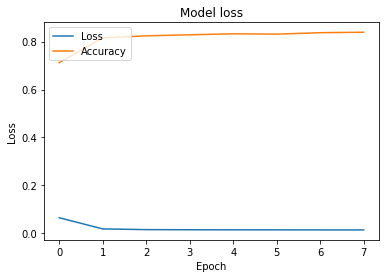

In [74]:
#Plot the loss and accuracy
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper left')
plt.show()



In [114]:
#Validate the model against the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

#Get the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


125/125 [==============================] - 0s 497us/step


0.77975

In [18]:
#Weightwatcher
import weightwatcher as ww
watcher = ww.WeightWatcher(model=model)
results = watcher.analyze()
results



,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,rf,sigma,spectral_norm,stable_rank,status,sv_max,warning,weak_rank_loss,xmax,xmin
0,0,dense_2,0.085853,64,200,3.125000,1.778470,3.378052,1.038621,True,...,1,0.112363,79.3125,5.554688,success,8.90625,over-trained,0,79.3125,1.09375
1,2,dense_3,0.096220,41,200,4.878049,2.673141,4.881615,0.993600,True,...,1,0.504471,67.0625,3.996094,success,8.18750,,0,67.0625,8.31250


In [117]:
#Save model (Tensorflow)
model.save('Models/AdjustmentValues/model.h5')

outputLabelsInvDict

#Save the inverse labels dictionary as json to model folder
import json
with open('Models/AdjustmentValues/softmaxlkp.json', 'w') as fp:
    json.dump(outputLabelsInvDict, fp)

